In [1]:
from glob import glob
import numpy as np
import xarray as xr
import itertools
import matplotlib.pyplot as plt
import cmocean.cm as cmo
from matplotlib.gridspec import GridSpec
from cartopy import geodesic
import cartopy.crs as ccrs
import shapely
import pandas as pd
from tqdm import tqdm
from datetime import datetime
import draft_functions as funk


In [2]:
run_for_loop = False

# Define initial conditions
initial_depth = -5000  # int(sys.argv[1])  # 5 # 60 # 5179
lon_sample = 6.287  # 6.25
lat_sample = -32.171  # -32.171
origin = (lon_sample, lat_sample)
sim_time = 4484
# Set simulation time range
start_time = datetime.strptime('2019-01-20 12:00:00', '%Y-%m-%d %H:%M:%S')

datelist = pd.date_range(end=start_time, periods=sim_time+1)[::-1]
end_time = datelist[0]

# Define simulation fragmentation timescales
simulations = [10] + [i for i in range(100, 501, 100)]
simulations += [1000, 10000]
# Set depth bins for histograms
depth_bins = np.linspace(-5500, 0, 56)  # creates a 100m bins

In [3]:
#%% 
if not run_for_loop:
    frag_into_NPs = np.load('../data/frag_into_NPs.npy', allow_pickle=True)[()]

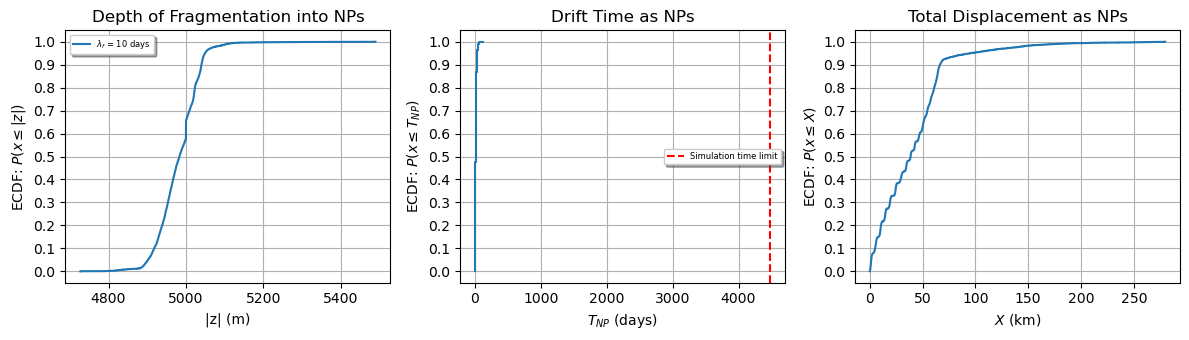

In [49]:
fig, ax = plt.subplots(1, 3, figsize=(12, 3.5), tight_layout=True)

# for j, ft in enumerate(simulations[::-1]):
for j, ft in enumerate([10]):

    x, y = funk.ecdf(abs(frag_into_NPs[ft]['depths']), normalized=True,
                     invert=False)
    ax[0].plot(x, y, drawstyle='steps-post', label=f'$\lambda_f$ = {ft} days')
    
    x, y = funk.ecdf(frag_into_NPs[ft]['particle_index'], normalized=True,
                     invert=False)
    ax[1].plot(x, y, drawstyle='steps-post')
    
    x, y = funk.ecdf(frag_into_NPs[ft]['displacement']/1e3, normalized=True,
                     invert=False)
    ax[2].plot(x, y, drawstyle='steps-post', label=f'$\lambda_f$ = {ft} days')



# ax[0].axvline(0, ls='--', label=r"Surface", color='r')
# ax[0].axvline(-initial_depth, ls='--', label=r"Sampling Depth", color='k')

ax[1].axvline(sim_time, ls='--', label=r"Simulation time limit", color='red')

handles, labels = ax[0].get_legend_handles_labels()
handles = handles[::-1]
labels = labels[::-1]

ax[0].legend(handles, labels, fontsize=6, shadow=True, ncol=2,
             loc='upper left')
ax[1].legend(fontsize=6, shadow=True, loc='center right')

# ax[1].semilogx()
ax[0].set_xlabel('|z| (m)')
ax[0].set_ylabel(r'ECDF: $P(x \leq |z|)$')
ax[0].set_title('Depth of Fragmentation into NPs')

ax[2].set_xlabel(r'$X$ (km)')
ax[2].set_ylabel(r'ECDF: $P(x \leq X)$')
ax[2].set_title('Total Displacement as NPs')

ax[1].set_xlabel(r'$T_{NP}$ (days)')
ax[1].set_ylabel(r'ECDF: $P(x \leq T_{NP})$')
ax[1].set_title('Drift Time as NPs')

gridy = np.linspace(0, 1, 11)
ax[0].set_yticks(gridy)
ax[1].set_yticks(gridy)
ax[2].set_yticks(gridy)

ax[0].grid()
ax[1].grid()
ax[2].grid()

In [51]:
for j, ft in enumerate(simulations[::-1]):
    
    x, y = funk.ecdf(frag_into_NPs[ft]['depths'], normalized=True)
    
    # x = abs(x)
    
    # idx_6 = np.where(x > -4000)[0][0]
    idx_5 = np.where(x >-5000)[0][0]
    
    print('-----', ft, '-----')
    # print('4000 - 5000 m: ', y[idx_6]- y[idx_5])
    print('5000 - 5500 m : ',  y[idx_5])

----- 10000 -----
5000 - 5500 m :  0.078857421875
----- 1000 -----
5000 - 5500 m :  0.1785888671875
----- 500 -----
5000 - 5500 m :  0.2481689453125
----- 400 -----
5000 - 5500 m :  0.2711181640625
----- 300 -----
5000 - 5500 m :  0.2989501953125
----- 200 -----
5000 - 5500 m :  0.3551025390625
----- 100 -----
5000 - 5500 m :  0.4141845703125
----- 10 -----
5000 - 5500 m :  0.4227294921875


In [46]:
y.shape

(7549,)

In [48]:
np.where(x>-4000)

(array([], dtype=int64),)

In [22]:
np.where(x<=-4000)[0][0]

0